In [67]:
from load_data import xu_masses, phi_masses, cross_sections


In [68]:
cross_sections

,xu_500_GeV,xu_750_GeV,xu_1000_GeV,xu_1500_GeV,xu_2000_GeV
phi_1_GeV,0.129200,0.06131,0.02999,0.007304,0.001679
phi_5_GeV,0.129100,0.06125,0.02996,0.007296,0.001676
phi_10_GeV,0.129100,0.06124,0.02995,0.007296,0.001674
phi_50_GeV,0.126200,0.06064,0.02980,0.007280,0.001671
phi_100_GeV,0.117200,0.05895,0.02934,0.007226,0.001665
phi_325_GeV,0.008969,0.03888,0.02374,0.006609,0.001585


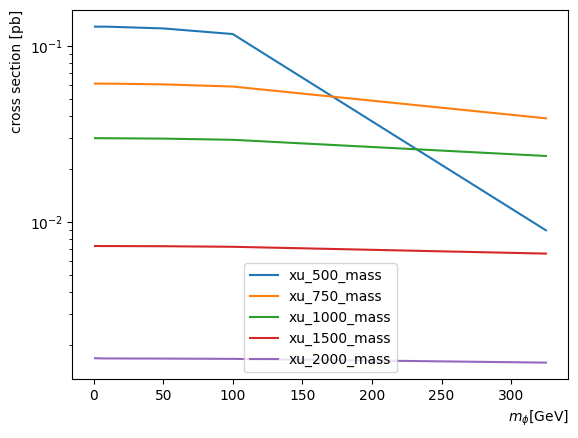

In [69]:
import matplotlib.pyplot as plt


# Plot cross sections for each xu mass
for xu_mass in xu_masses:
    x_axis = phi_masses
    y_axis = cross_sections["xu_{}_GeV".format(xu_mass)]
    plt.plot(x_axis, y_axis, label='xu_{}_mass'.format(xu_mass))

# Set plot title and labels
plt.title('')
plt.xlabel(r'$m_{\phi}$[GeV]',loc='right')
plt.ylabel('cross section [pb]',loc='top')

# Set the y axis to log scale
plt.yscale('log')

# Set the legend
plt.legend()

# Display the plot
plt.show()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


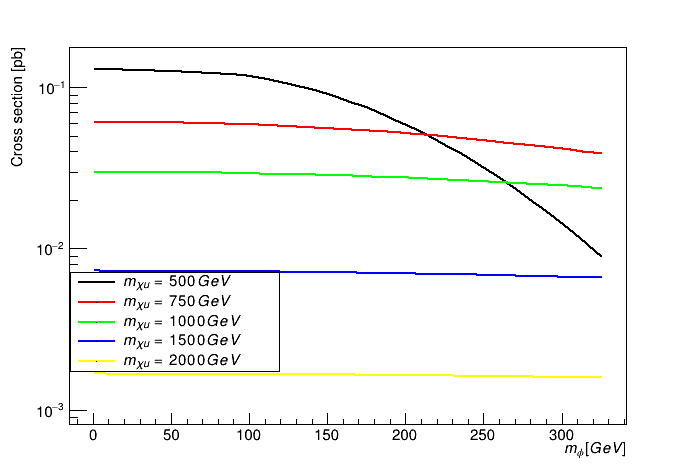

In [70]:
import ROOT
import array

# Create a new TCanvas
c1 = ROOT.TCanvas('c1', 'Cross sections for all xu masses as a function of phi masses', 200, 10, 700, 500)

# Create a TMultiGraph to hold multiple TGraphs
mg = ROOT.TMultiGraph()

# Plot cross sections for each xu mass
for i, xu_mass in enumerate(xu_masses):
    x_axis = array.array('d', phi_masses)
    y_axis = array.array('d', cross_sections["xu_{}_GeV".format(xu_mass)])
    
    # Create a TGraph for each xu mass
    graph = ROOT.TGraph(len(x_axis), x_axis, y_axis)
    graph.SetTitle('m_{{\chi u}} = {}GeV'.format(xu_mass))
    graph.SetLineColor(i+1)  # Set different color for each graph
    graph.SetLineWidth(2)
    
    # Add the TGraph to the TMultiGraph
    mg.Add(graph)

# Draw the TMultiGraph
mg.Draw("AC")

# Set plot title and labels
mg.SetTitle(';m_{\phi} [GeV];Cross section [pb]')

# Use log scale
c1.SetLogy()

# Draw the legend
c1.BuildLegend()

# Display the plot
c1.Draw()